In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression

In [2]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: cholesterol in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14

data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data
data.iloc[:, -1] = data.iloc[:, -1].clip(0, 1) # clip last column (output) between 0 and 1, both inclusive

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print("Num features:", n)
print("Num examples:", m)
    
# a few examples from the dataset 
print()
print(data.head())

X = data.values[:, :-1]
y = data.values[:, -1:]



categoricalColumnsNames = ["sex", 
                      "chestPainType", 
                      "fastingBloodSugar", 
                      "restingEcg", 
                      "exerciseInducedAngina", 
                      "stSlope",
                      "majorVessels",
                      "thalassemia"]
continuousColumns = data.drop(categoricalColumnsNames, axis=1)
continuousColumnsNames = [name for name in myNames if name not in categoricalColumnsNames and name != "diagnosis"]
categoricalColumns = data.drop(continuousColumnsNames, axis=1)
if "diagnosis" in continuousColumns:
    continuousColumns = continuousColumns.drop("diagnosis", axis=1)
if "diagnosis" not in categoricalColumns:
    categoricalColumns = data["diagnosis"]


Num features: 13
Num examples: 297

    age  sex  chestPainType  restingBP  serumCholesterol  fastingBloodSugar  \
0  63.0  1.0            1.0      145.0             233.0                1.0   
1  67.0  1.0            4.0      160.0             286.0                0.0   
2  67.0  1.0            4.0      120.0             229.0                0.0   
3  37.0  1.0            3.0      130.0             250.0                0.0   
4  41.0  0.0            2.0      130.0             204.0                0.0   

   restingEcg  maxHeartRate  exerciseInducedAngina  stDepression  stSlope  \
0         2.0         150.0                    0.0           2.3      3.0   
1         2.0         108.0                    1.0           1.5      2.0   
2         2.0         129.0                    1.0           2.6      2.0   
3         0.0         187.0                    0.0           3.5      3.0   
4         2.0         172.0                    0.0           1.4      1.0   

   majorVessels  thalassem

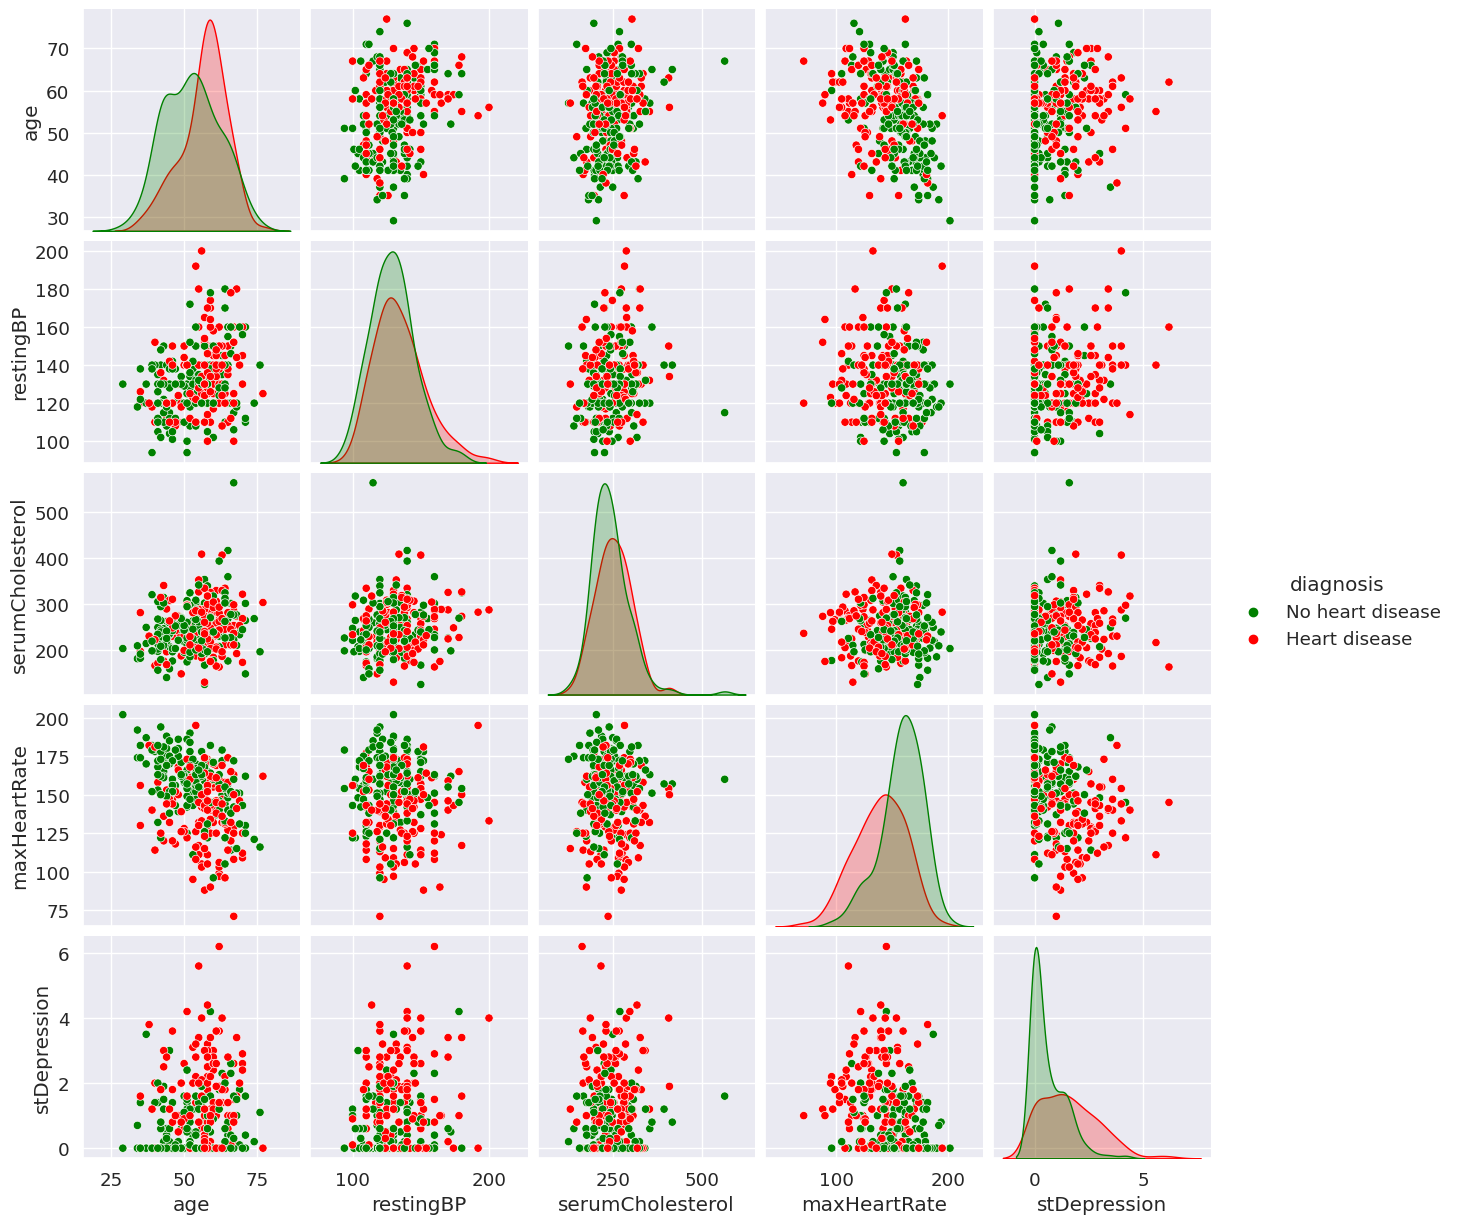

In [3]:
import seaborn as sns

# Scatter matrix (used for continuous features)

# In last column, replace 0's by "No heart disesase" and 1's by "Heart disease"
continuousColumnsWithOutput = continuousColumns.copy()
continuousColumnsWithOutput["diagnosis"] = data["diagnosis"]
dictReplace = {0: "No heart disease", 1: "Heart disease"}
continuousColumnsWithOutput["diagnosis"] = continuousColumnsWithOutput["diagnosis"].replace(dictReplace)

sns.set(font_scale=1.2)
myPalette = {"No heart disease":"green", "Heart disease":"red"}
matrix = sns.pairplot(
    continuousColumnsWithOutput, 
    hue='diagnosis', 
    palette=myPalette)
plt.show()
sns.set(font_scale=1)

# Non regularized logistic regression

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(theta, X, y):
    # Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    
    #number of training examples 
    m = len(y)
    
    #vector of the model predictions for all training examples   
    h = sigmoid(np.dot(X, theta))
         
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))

    #cost function
    cost = 1/m * sum(error)
       
    #vector of gradients of all model parameters theta   
    grad = 1/m * np.dot(X.transpose(),(h - y))
    
    return cost[0] , grad

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean)/ std
    
    return X_norm , mean , std


In [5]:
#Run featureNormalization to normalize X, store the means and stds.

X_norm, X_mean, X_std = featureNormalization(X)

#After normalizing the features, add an extra column of 1's corresponding to x0 = 1.
X_norm= np.append(np.ones((X_norm.shape[0], 1)), X_norm, axis=1)


# Inicialize vector theta = 0
n_size = (data.shape[1], 1)
initial_theta = np.zeros(n_size)

#Run costFunction
cost, grad= costFunction(initial_theta, X_norm, y)

print("Cost of initial theta is",round(cost,3) )   
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693
Gradient at initial theta (zeros): [[ 0.03872054]
 [-0.11319662]
 [-0.13881522]
 [-0.2038583 ]
 [-0.07651454]
 [-0.04002183]
 [-0.00157866]
 [-0.08292197]
 [ 0.21127216]
 [-0.21004507]
 [-0.2113893 ]
 [-0.16602447]
 [-0.23089882]
 [-0.26252902]]


In [6]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #number of training examples
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        theta -= alpha * grad
        J_history.append(cost)
    
    return theta , J_history

In [7]:
theta , J_history = gradientDescent(X_norm, y, initial_theta, 0.5, 5000)

print("Theta optimized by gradient descent:",theta)

print("The cost for the optimized theta:",round(J_history[-1],3))

Theta optimized by gradient descent: [[-0.06875875]
 [-0.12796138]
 [ 0.61367059]
 [ 0.55472475]
 [ 0.42637   ]
 [ 0.25930191]
 [-0.35959244]
 [ 0.2434953 ]
 [-0.47329674]
 [ 0.43431445]
 [ 0.28799664]
 [ 0.3517782 ]
 [ 1.18833707]
 [ 0.6656411 ]]
The cost for the optimized theta: 0.345


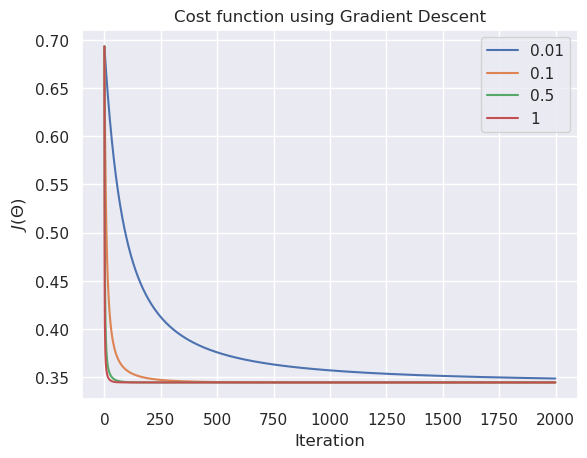

In [8]:
# Plotting cost function using gradient descent

alphas=[0.01, 0.1, 0.5, 1] # learning rates
for alpha in alphas:
    initial_theta = np.zeros(n_size)
    iterations = 2000
    _, J_history = gradientDescent(X_norm, y, initial_theta, alpha, iterations)
    plt.plot(range(iterations), J_history, label = alpha)
    
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend()
plt.show()

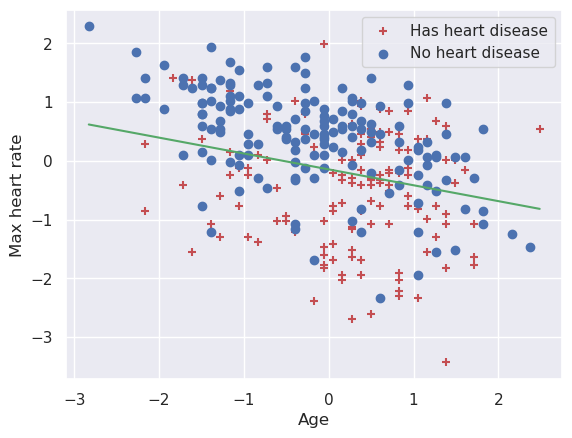

In [9]:
pos = y==1
neg = y==0
plt.scatter(X_norm[pos[:,0],1],X_norm[pos[:,0],8],c="r",marker="+", label = "Has heart disease")
plt.scatter(X_norm[neg[:,0],1],X_norm[neg[:,0],8],c="b",marker="o", label = "No heart disease")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
#plt.ylim(,200)
plt.legend()

# plot the decision boundary (green line)
x_value = np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value = -((theta[0] +theta[1]*x_value)/theta[8])
plt.plot(x_value,y_value, "g")

plt.show()

In [15]:
# Prediction

def predict(x_test):
    assert x_test.shape[0] == n
    x_test = (x_test - X_mean)/X_std
    x_test = np.append(np.ones(1),x_test)
    prob = sigmoid(x_test.dot(initial_theta))
    hasHeartDisease = prob[0] > 0.5
    if hasHeartDisease:
        strHasHeartDisease = "has heart disease"
    else:
        strHasHeartDisease = "no heart disease"
    print("Prediction " + str(round(prob[0],2)) + " => " + strHasHeartDisease)

x_test = np.array([38.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   180.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   2.0, # majorVessels
                   6.0]) # thalassemia
predict(x_test)

x_test = np.array([66.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   80.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   2.0, # majorVessels
                   6.0]) # thalassemia
predict(x_test)

Prediction 0.18 => no heart disease
Prediction 0.53 => has heart disease


In [11]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X_norm.dot(theta)
    return predictions>0

In [12]:
p=classifierPredict(theta,X)
print("Train Accuracy:", round((sum(p==y)[0] / X.shape[0])*100, 2),"%")

Train Accuracy: 84.85 %
